In [13]:
import pandas as pd
import numpy as np
import os
import os.path as osp
import statsmodels.api as sm

In [14]:
path = osp.dirname(osp.abspath(os.getcwd()))
data_path = osp.abspath(osp.join(path,'Data'))
out_path = osp.abspath(osp.join(path,'Output'))

In [15]:
covid_path = osp.join(data_path,'cleaned_covid2.csv')
df = pd.read_csv(covid_path,index_col=0)
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df.head()

,age,latitude,longitude,chronic_disease_binary_N,chronic_disease_binary_Y,sex_female,country_Algeria,country_Australia,country_Brazil,country_France,...,country_Romania,country_San Marino,country_Singapore,country_South Korea,country_Switzerland,country_Thailand,country_United States,country_Vietnam,country_Zimbabwe,outcome_D
0,42,36.826150,101.44370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,36.826150,101.44370,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,36.826150,101.44370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,44.959710,10.68922,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,21.327397,105.63005,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df.columns

Index(['age', 'latitude', 'longitude', 'chronic_disease_binary_N',
       'chronic_disease_binary_Y', 'sex_female', 'country_Algeria',
       'country_Australia', 'country_Brazil', 'country_France',
       'country_Gambia', 'country_Germany', 'country_Ghana', 'country_Guyana',
       'country_Italy', 'country_Japan', 'country_Malaysia', 'country_Nepal',
       'country_Niger', 'country_Philippines', 'country_Romania',
       'country_San Marino', 'country_Singapore', 'country_South Korea',
       'country_Switzerland', 'country_Thailand', 'country_United States',
       'country_Vietnam', 'country_Zimbabwe', 'outcome_D'],
      dtype='object')

In [17]:
df.describe().to_csv('data_desc.csv')

In [18]:
#df.insert(len(df.columns),'Lat_Lon_Int',df.latitude* df.longitude)

In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
y = df.outcome_D
X = df.drop('outcome_D',axis=1)
kf = KFold(n_splits=10)
conf_matrix = []
f1 = []
auc = []
for train, test in kf.split(df):
    mod = LogisticRegression(solver='liblinear')
    mod.fit(X.loc[train,:],y.loc[train])
    pred = mod.predict(X.loc[test,:])
    conf_matrix.append(metrics.confusion_matrix(y.loc[test],pred))
    f1.append(metrics.f1_score(y.loc[test],pred))
print(sum(conf_matrix)/10)
print(sum(f1)/10)
    

[[25.9  3.4]
 [ 3.4  8.6]]
0.7171950851635212


In [44]:
pd.DataFrame(sum(conf_matrix)/10,columns=['True Positive','True Negative'],index=['Predict Positive',"Predicted Negative"])

,True Positive,True Negative
Predict Positive,25.9,3.4
Predicted Negative,3.4,8.6


In [22]:
mod = LogisticRegression(solver='liblinear')
mod.fit(X,y)
mod.coef_

array([[ 0.06139003,  0.02006555, -0.00657607, -0.19183993,  1.5718792 ,
        -0.44926095, -0.02269239, -0.26159082, -0.75362426, -0.2170538 ,
         0.05650872, -0.57568776,  0.        ,  0.1624657 ,  0.16741324,
        -0.44267694, -0.68781207, -0.25528558, -1.53422404, -0.17786953,
        -0.75646648,  0.05965469, -2.33963372, -1.04836605, -0.5978587 ,
        -0.42192484,  0.21386914, -2.12177148,  0.76259335]])

In [45]:
odds_ratios

,age,latitude,longitude,chronic_disease_binary_N,chronic_disease_binary_Y,sex_female,country_Algeria,country_Australia,country_Brazil,country_France,...,country_Philippines,country_Romania,country_San Marino,country_Singapore,country_South Korea,country_Switzerland,country_Thailand,country_United States,country_Vietnam,country_Zimbabwe
0,1.063314,1.020268,0.993446,0.825439,4.815689,0.6381,0.977563,0.769826,0.470658,0.804887,...,0.837052,0.469322,1.06147,0.096363,0.35051,0.549988,0.655783,1.238461,0.119819,2.143829


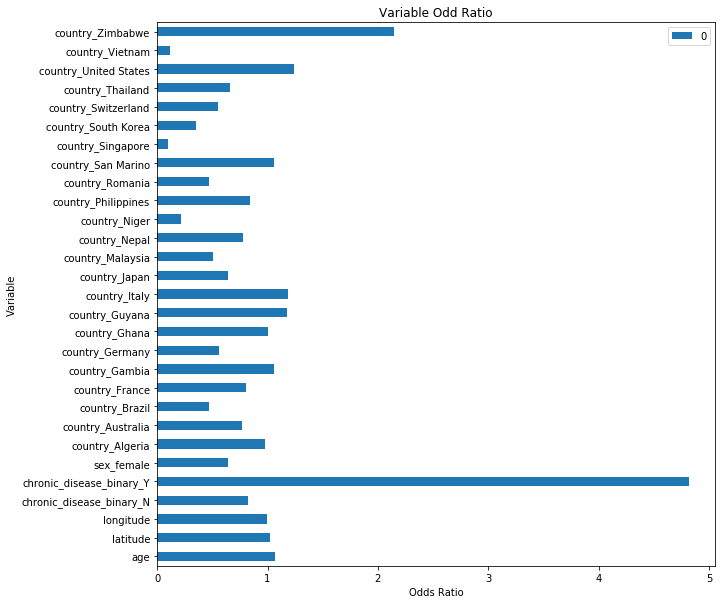

In [33]:
odds_ratios = pd.DataFrame.from_records(np.exp(mod.coef_))
odds_ratios.columns = X.columns
fig, ax = plt.subplots(figsize=(10,10))
odds_ratios.T.plot.barh(ax=ax)
fig_path = osp.join(out_path,"Odds_Ratio.png")
ax.set_title("Variable Odd Ratio")
ax.set_xlabel('Odds Ratio')
ax.set_ylabel('Variable')
fig.savefig(fig_path)

In [35]:
mod2 = sm.GLM(y, X, family=sm.families.Binomial())
mod_results = mod2.fit()
print(mod_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              outcome_D   No. Observations:                  413
Model:                            GLM   Df Residuals:                      385
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -80.861
Date:                Tue, 21 Apr 2020   Deviance:                       161.72
Time:                        12:37:51   Pearson chi2:                     324.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                     

In [36]:
df = pd.DataFrame(mod_results.summary().tables[1])
df.columns= df.iloc[0,:]
df.index = df.iloc[:,0]
df = df.iloc[1:,1:]
df


,coef,std err,z,P>|z|,[0.025,0.975]
,,,,,,
age,0.0842,0.015,5.795,0.000,0.056,0.113
latitude,-0.1572,0.063,-2.493,0.013,-0.281,-0.034
longitude,0.0075,0.017,0.436,0.663,-0.026,0.041
chronic_disease_binary_N,-24.8671,2.16e+05,-0.000,1.000,-4.23e+05,4.23e+05
chronic_disease_binary_Y,1.9953,0.528,3.779,0.000,0.961,3.030
sex_female,-0.8735,0.448,-1.952,0.051,-1.751,0.004
country_Algeria,1.5527,2.397,0.648,0.517,-3.145,6.250
country_Australia,-13.0870,4.725,-2.769,0.006,-22.349,-3.825
country_Brazil,-33.3102,1.01e+05,-0.000,1.000,-1.98e+05,1.97e+05


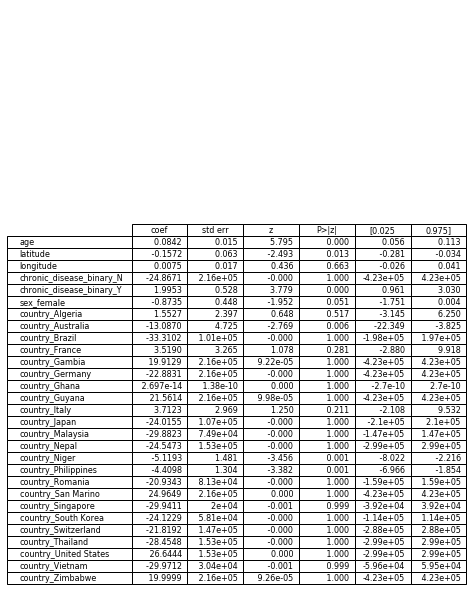

In [41]:
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, df)
table_path = osp.join(out_path, 'ResultsTable.png')
plt.savefig(table_path)

In [48]:
df.columns= df.iloc[0,]